In [1]:
from workshop.dataset import CUBDataset
from workshop.model import BirdNet
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip, ToTensor, Resize
import matplotlib.pyplot as plt
import torch

from pathlib import Path

### View examples of training data

In [2]:
data_path = "/local_storage/datasets/CUB_20"
batch_size = 32

dataset = CUBDataset(
        root_directory=data_path,
        set_="train",
        transforms=Compose([
            Resize(256),
            RandomCrop((224, 224), pad_if_needed=True),
            RandomHorizontalFlip(),
            ToTensor()
        ])
    )
data_loader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1)

model = BirdNet(20)

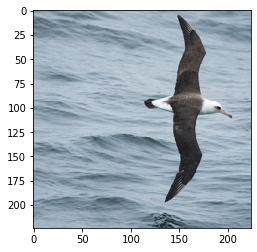

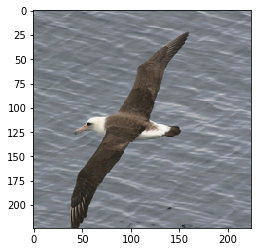

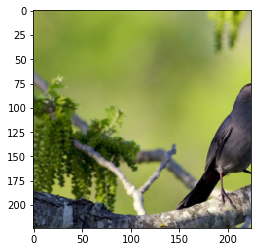

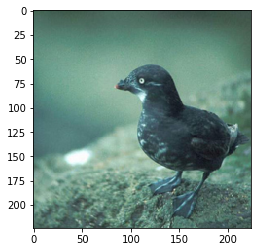

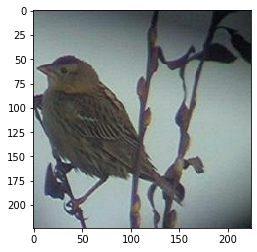

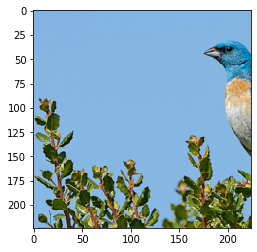

In [4]:
batch = next(iter(data_loader))
img_batch = batch[0]
for i, image in enumerate(img_batch):
    image = image.permute(1,2,0)
    plt.imshow(image)
    plt.show()
    if i > 4:
        break


### Load trained model

In [5]:
project_dir = Path("..").resolve()

#edit this to be a run you have actually conducted
model_path = project_dir/"runs/bs64_lr0.001_wd1e-05_XN8QZ7FOVG/final_model.pt"
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

### View inference examples

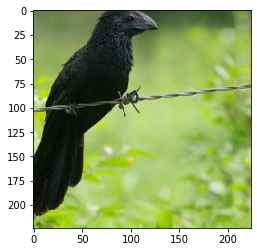

KeyError: 17

In [7]:
batch = next(iter(data_loader))
input_ = batch[0]
target = batch[1]
output_ = model(input_)

for datapointIdx, img in enumerate(input_): 
    img = input_[datapointIdx]
    prediction = output_[datapointIdx].argmax().item()
    pltImage = img.permute(1,2,0)
    plt.imshow(pltImage)
    plt.show()
    print("Guessed class: %s, ground truth: %s" %(dataset.classIdx_to_label_dict[prediction], dataset.classIdx_to_label_dict[target[datapointIdx]]))
    if(datapointIdx>4):
        break
    
    

In [ ]:
dataset.id_to_label_dict()
